In [215]:
# Libraries required for this tutorial...

from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import os
import xarray as xr
import xwrf
import glob

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec

from matplotlib.ticker import MultipleLocator, FormatStrFormatter  # ticker spacing
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import metpy
import metpy.calc as mpcalc
from metpy.plots import colortables, Hodograph, SkewT
from metpy.units import units

In [216]:
path_staging = "/data/project/ARM_Summer_School_2024_Data/lasso_tutorial/cacti/lasso-cacti"  # path on Jupyter
filename = f"{path_staging}/20190129/eda09/base/les/subset_d3/corlasso_met_2019012900eda09d3_base_M1.m1.20190129.183000.nc"
ds = xr.open_dataset(filename)
ds

<xarray.Dataset> Size: 6GB
Dimensions:               (Time: 1, south_north: 865, west_east: 750,
                           bottom_top: 149)
Coordinates:
  * Time                  (Time) datetime64[ns] 8B 2019-01-29T18:30:00
    XLONG                 (south_north, west_east) float32 3MB ...
    XLAT                  (south_north, west_east) float32 3MB ...
    XTIME                 (Time) float32 4B ...
Dimensions without coordinates: south_north, west_east, bottom_top
Data variables: (12/52)
    ITIMESTEP             (Time) int32 4B ...
    MUTOT                 (Time, south_north, west_east) float32 3MB ...
    HGT                   (Time, south_north, west_east) float32 3MB ...
    HAMSL                 (Time, bottom_top, south_north, west_east) float32 387MB ...
    P_HYD                 (Time, bottom_top, south_north, west_east) float32 387MB ...
    PRESSURE              (Time, bottom_top, south_north, west_east) float32 387MB ...
    ...                    ...
    MULFC                 (Time, south_north, west_east) float32 3MB ...
    MULNB                 (Time, south_north, west_east) float32 3MB ...
    MULPL                 (Time, south_north, west_east) float32 3MB ...
    MUCAPE                (Time, south_north, west_east) float32 3MB ...
    MUCIN                 (Time, south_north, west_east) float32 3MB ...
    REFL_10CM_MAX         (Time, south_north, west_east) float32 3MB ...
Attributes: (12/39)
    DX:                          500.0
    DY:                          500.0
    SIMULATION_START_DATE:       2019-01-29_06:00:00
    WEST-EAST_GRID_DIMENSION:    751
    SOUTH-NORTH_GRID_DIMENSION:  866
    BOTTOM-TOP_GRID_DIMENSION:   150
    ...                          ...
    doi_isPartOf_lasso-cacti:    https://doi.org/10.5439/1905789
    doi_isDocumentedBy:          https://doi.org/10.2172/1905845
    doi_thisFileType:            https://doi.org/10.5439/1905819
    history:                     processed by user d3m088 on machine cirrus28...
    filename_user:               corlasso_met_2019012900eda09d3_base_M1.m1.20...
    filename_storage:            corlassomet2019012900eda09d3baseM1.m1.201901...

In [217]:
file_list = sorted(glob.glob(f'{path_staging}/20190129/eda09/base/les/subset_d3/corlasso_met_*'))

In [42]:
#file_list

In [218]:
ds = xr.open_dataset(file_list[20])
ds

<xarray.Dataset> Size: 6GB
Dimensions:               (Time: 1, south_north: 865, west_east: 750,
                           bottom_top: 149)
Coordinates:
  * Time                  (Time) datetime64[ns] 8B 2019-01-29T11:00:00
    XLONG                 (south_north, west_east) float32 3MB ...
    XLAT                  (south_north, west_east) float32 3MB ...
    XTIME                 (Time) float32 4B ...
Dimensions without coordinates: south_north, west_east, bottom_top
Data variables: (12/52)
    ITIMESTEP             (Time) int32 4B ...
    MUTOT                 (Time, south_north, west_east) float32 3MB ...
    HGT                   (Time, south_north, west_east) float32 3MB ...
    HAMSL                 (Time, bottom_top, south_north, west_east) float32 387MB ...
    P_HYD                 (Time, bottom_top, south_north, west_east) float32 387MB ...
    PRESSURE              (Time, bottom_top, south_north, west_east) float32 387MB ...
    ...                    ...
    MULFC                 (Time, south_north, west_east) float32 3MB ...
    MULNB                 (Time, south_north, west_east) float32 3MB ...
    MULPL                 (Time, south_north, west_east) float32 3MB ...
    MUCAPE                (Time, south_north, west_east) float32 3MB ...
    MUCIN                 (Time, south_north, west_east) float32 3MB ...
    REFL_10CM_MAX         (Time, south_north, west_east) float32 3MB ...
Attributes: (12/39)
    DX:                          500.0
    DY:                          500.0
    SIMULATION_START_DATE:       2019-01-29_06:00:00
    WEST-EAST_GRID_DIMENSION:    751
    SOUTH-NORTH_GRID_DIMENSION:  866
    BOTTOM-TOP_GRID_DIMENSION:   150
    ...                          ...
    doi_isPartOf_lasso-cacti:    https://doi.org/10.5439/1905789
    doi_isDocumentedBy:          https://doi.org/10.2172/1905845
    doi_thisFileType:            https://doi.org/10.5439/1905819
    history:                     processed by user d3m088 on machine cirrus89...
    filename_user:               corlasso_met_2019012900eda09d3_base_M1.m1.20...
    filename_storage:            corlassomet2019012900eda09d3baseM1.m1.201901...

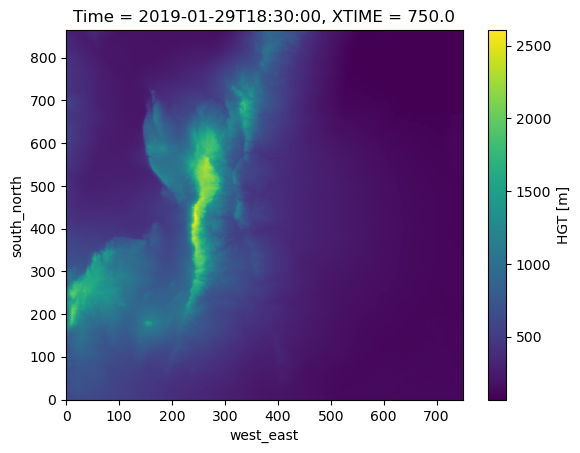

In [207]:
ds.HGT.plot()

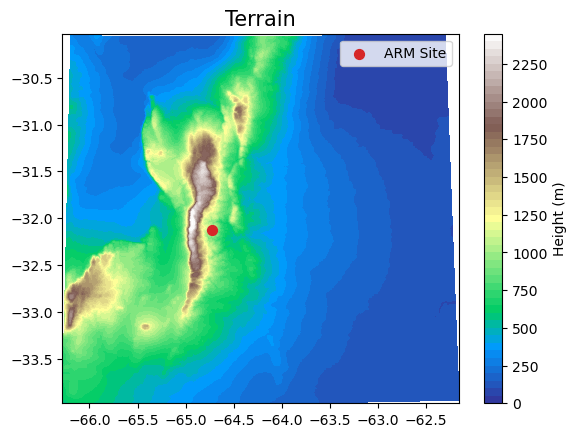

In [45]:
CSAPR_lat = -32.12641
CSAPR_lon = -64.72837

cf = plt.contourf(ds.XLONG, ds.XLAT, ds.HGT[0,:,:], cmap='terrain', levels=np.arange(0, 2500, 50))
plt.scatter(CSAPR_lon, CSAPR_lat, s=50, c='tab:red', label='ARM Site')
plt.title('Terrain', fontsize=15)
plt.colorbar(cf, label='Height (m)')
plt.legend()

In [46]:
ds.HGT[0,:,:].shape

(865, 750)

In [47]:
ds.XLONG.shape

(865, 750)

In [48]:
ds.XLONG.shape

(865, 750)

In [53]:
import numpy as np
import metpy.calc as mcalc
from metpy.units import units

In [78]:
td_array = np.zeros((ds.RH.shape[2], ds.RH.shape[3]))
temps = ds.TEMPERATURE[0,0,:,:].values
rhs = ds.RH[0,0,:,:].values
for i in np.arange(0, ds.RH.shape[2], 1):
    for j in np.arange(0, ds.RH.shape[3], 1):
        rh_val = rhs[i,j] * units('%')
        temp_val = (temps[i,j]-273.15) * units('degC')
        td = mcalc.dewpoint_from_relative_humidity(temp_val, rh_val)
        td_array[i,j] = td.magnitude

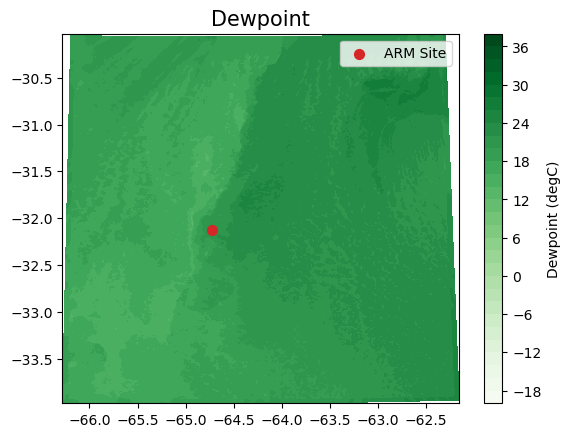

In [85]:
CSAPR_lat = -32.12641
CSAPR_lon = -64.72837

cf = plt.contourf(ds.XLONG, ds.XLAT, td_array, cmap='Greens', levels=np.arange(-20, 40, 2))
plt.scatter(CSAPR_lon, CSAPR_lat, s=50, c='tab:red', label='ARM Site')
plt.title('Dewpoint', fontsize=15)
plt.colorbar(cf, label='Dewpoint (degC)')
plt.legend()

In [129]:
# u = ds.UMET10.values[0,:,:] * units('m/s')
# v = ds.VMET10.values[0,:,:] * units('m/s')
# dx = 100 * units('m')
# dy = 100 * units('m')

# div = mcalc.divergence(u,v,dx=dx,dy=dy)

In [176]:
#ds2 = ds.assign_coords(bottom_top=(ds["HAMSL"]))

In [219]:
u = ds.UMET.values[0,10,:,:] * units('m/s')
v = ds.VMET.values[0,10,:,:] * units('m/s')
dx = 100 * units('m')
dy = 100 * units('m')

div = mcalc.divergence(u,v,dx=dx,dy=dy)

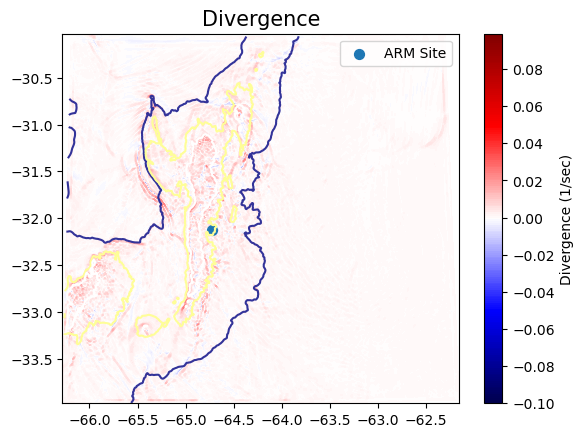

In [220]:
CSAPR_lat = -32.12641
CSAPR_lon = -64.72837

cf = plt.contourf(ds.XLONG, ds.XLAT, div, cmap='seismic', levels=np.arange(-0.1, 0.1, 0.001))
#plt.xlim([-65,-64])
#plt.ylim([-33, -32])
plt.contour(ds.XLONG, ds.XLAT, ds.HGT[0,:,:], levels=[500, 1000, 1500], cmap='terrain')
plt.scatter(CSAPR_lon, CSAPR_lat, s=50, c='tab:blue', label='ARM Site')
plt.title('Divergence', fontsize=15)
plt.colorbar(cf, label='Divergence (1/sec)')
plt.legend()

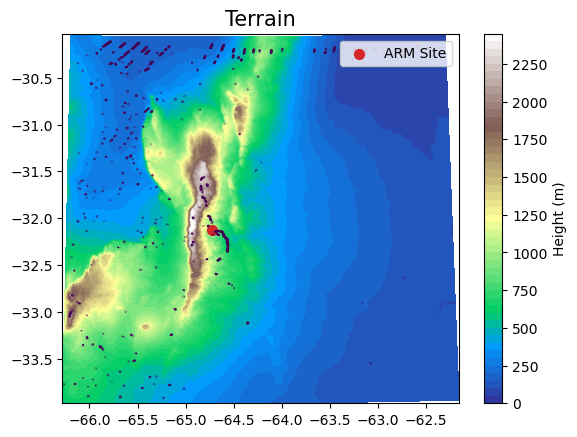

In [140]:
CSAPR_lat = -32.12641
CSAPR_lon = -64.72837

cf = plt.contourf(ds.XLONG, ds.XLAT, ds.HGT[0,:,:], cmap='terrain', levels=np.arange(0, 2500, 50))
#plt.contour(ds.XLONG, ds.XLAT, div, levels=np.arange(-0.05, 0, 0.025))
plt.contour(ds.XLONG, ds.XLAT, div, levels=[-0.025])
plt.scatter(CSAPR_lon, CSAPR_lat, s=50, c='tab:red', label='ARM Site')
plt.title('Terrain', fontsize=15)
plt.colorbar(cf, label='Height (m)')
plt.legend()

Divergence Loop

In [145]:
path_staging = "/data/project/ARM_Summer_School_2024_Data/lasso_tutorial/cacti/lasso-cacti"  # path on Jupyter
file_list = sorted(glob.glob(f'{path_staging}/20190129/eda09/base/les/subset_d3/corlasso_met_*'))

In [147]:
ds = xr.open_mfdataset(file_list)
ds

<xarray.Dataset> Size: 430GB
Dimensions:               (Time: 73, south_north: 865, west_east: 750,
                           bottom_top: 149)
Coordinates:
  * Time                  (Time) datetime64[ns] 584B 2019-01-29T06:00:00 ... ...
    XLONG                 (south_north, west_east) float32 3MB dask.array<chunksize=(865, 750), meta=np.ndarray>
    XLAT                  (south_north, west_east) float32 3MB dask.array<chunksize=(865, 750), meta=np.ndarray>
    XTIME                 (Time) float32 292B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: south_north, west_east, bottom_top
Data variables: (12/52)
    ITIMESTEP             (Time) int32 292B dask.array<chunksize=(1,), meta=np.ndarray>
    MUTOT                 (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    HGT                   (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    HAMSL                 (Time, bottom_top, south_north, west_east) float32 28GB dask.array<chunksize=(1, 50, 289, 250), meta=np.ndarray>
    P_HYD                 (Time, bottom_top, south_north, west_east) float32 28GB dask.array<chunksize=(1, 50, 289, 250), meta=np.ndarray>
    PRESSURE              (Time, bottom_top, south_north, west_east) float32 28GB dask.array<chunksize=(1, 50, 289, 250), meta=np.ndarray>
    ...                    ...
    MULFC                 (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    MULNB                 (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    MULPL                 (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    MUCAPE                (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    MUCIN                 (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    REFL_10CM_MAX         (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
Attributes: (12/39)
    DX:                          500.0
    DY:                          500.0
    SIMULATION_START_DATE:       2019-01-29_06:00:00
    WEST-EAST_GRID_DIMENSION:    751
    SOUTH-NORTH_GRID_DIMENSION:  866
    BOTTOM-TOP_GRID_DIMENSION:   150
    ...                          ...
    doi_isPartOf_lasso-cacti:    https://doi.org/10.5439/1905789
    doi_isDocumentedBy:          https://doi.org/10.2172/1905845
    doi_thisFileType:            https://doi.org/10.5439/1905819
    history:                     processed by user d3m088 on machine cirrus89...
    filename_user:               corlasso_met_2019012900eda09d3_base_M1.m1.20...
    filename_storage:            corlassomet2019012900eda09d3baseM1.m1.201901...

In [149]:
u_all = ds.UMET[:,10,:,:]
v_all = ds.VMET[:,10,:,:]

In [165]:
dx = 100 * units('m')
dy = 100 * units('m')

divergence = np.zeros((u_all.shape[0], u_all.shape[1], u_all.shape[2]))

for t in np.arange(0, u_all.shape[0], 1): 
    u = u_all[t,:,:] * units('m/s')
    v = v_all[t,:,:] * units('m/s')
    
    div = mcalc.divergence(u,v,dx=dx,dy=dy)
    divergence[t,:,:] = div.values

/tmp/ipykernel_35760/2727113271.py:10: UserWarning: More than one time coordinate present for variable  "UMET".
  div = mcalc.divergence(u,v,dx=dx,dy=dy)
/tmp/ipykernel_35760/2727113271.py:10: UserWarning: Horizontal dimension numbers not found. Defaulting to (..., Y, X) order.
  div = mcalc.divergence(u,v,dx=dx,dy=dy)
/tmp/ipykernel_35760/2727113271.py:10: UserWarning: More than one time coordinate present for variable  "UMET".
  div = mcalc.divergence(u,v,dx=dx,dy=dy)
/tmp/ipykernel_35760/2727113271.py:10: UserWarning: Horizontal dimension numbers not found. Defaulting to (..., Y, X) order.
  div = mcalc.divergence(u,v,dx=dx,dy=dy)
/tmp/ipykernel_35760/2727113271.py:10: UserWarning: More than one time coordinate present for variable  "UMET".
  div = mcalc.divergence(u,v,dx=dx,dy=dy)
/tmp/ipykernel_35760/2727113271.py:10: UserWarning: Horizontal dimension numbers not found. Defaulting to (..., Y, X) order.
  div = mcalc.divergence(u,v,dx=dx,dy=dy)
/tmp/ipykernel_35760/2727113271.py:10

In [190]:
ds["Divergence"]=(['Time', 'south_north', 'west_east'],  divergence)

In [198]:
ds

<xarray.Dataset> Size: 431GB
Dimensions:               (Time: 73, south_north: 865, west_east: 750,
                           bottom_top: 149)
Coordinates:
  * Time                  (Time) datetime64[ns] 584B 2019-01-29T06:00:00 ... ...
    XLONG                 (south_north, west_east) float32 3MB dask.array<chunksize=(865, 750), meta=np.ndarray>
    XLAT                  (south_north, west_east) float32 3MB dask.array<chunksize=(865, 750), meta=np.ndarray>
    XTIME                 (Time) float32 292B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: south_north, west_east, bottom_top
Data variables: (12/53)
    ITIMESTEP             (Time) int32 292B dask.array<chunksize=(1,), meta=np.ndarray>
    MUTOT                 (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    HGT                   (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    HAMSL                 (Time, bottom_top, south_north, west_east) float32 28GB dask.array<chunksize=(1, 50, 289, 250), meta=np.ndarray>
    P_HYD                 (Time, bottom_top, south_north, west_east) float32 28GB dask.array<chunksize=(1, 50, 289, 250), meta=np.ndarray>
    PRESSURE              (Time, bottom_top, south_north, west_east) float32 28GB dask.array<chunksize=(1, 50, 289, 250), meta=np.ndarray>
    ...                    ...
    MULNB                 (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    MULPL                 (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    MUCAPE                (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    MUCIN                 (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    REFL_10CM_MAX         (Time, south_north, west_east) float32 189MB dask.array<chunksize=(1, 865, 750), meta=np.ndarray>
    Divergence            (Time, south_north, west_east) float64 379MB -0.001...
Attributes: (12/39)
    DX:                          500.0
    DY:                          500.0
    SIMULATION_START_DATE:       2019-01-29_06:00:00
    WEST-EAST_GRID_DIMENSION:    751
    SOUTH-NORTH_GRID_DIMENSION:  866
    BOTTOM-TOP_GRID_DIMENSION:   150
    ...                          ...
    doi_isPartOf_lasso-cacti:    https://doi.org/10.5439/1905789
    doi_isDocumentedBy:          https://doi.org/10.2172/1905845
    doi_thisFileType:            https://doi.org/10.5439/1905819
    history:                     processed by user d3m088 on machine cirrus89...
    filename_user:               corlasso_met_2019012900eda09d3_base_M1.m1.20...
    filename_storage:            corlassomet2019012900eda09d3baseM1.m1.201901...

In [195]:
import ipywidgets as ipw
import hvplot.xarray # noqa
import hvplot.pandas # noqa
import panel as pn
import pandas as pd
import panel.widgets as pnw
import xarray as xr

In [203]:
#ds.Divergence.interactive.sel(Time=pnw.DiscreteSlider).plot()

ds.Divergence.hvplot(x='west_east', y='south_north', groupby='Time', clim=(-0.01, 0.01),  # sets colormap limits
    widget_type="scrubber",
    widget_location="bottom", rasterize=True)

Column
    [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', widget_location='bottom', widget_type='scrubber', width=700)
    [1] WidgetBox(align=('center', 'end'))
        [0] Player(end=72, width=550)